In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import gc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, LabelBinarizer, OrdinalEncoder
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('datates.csv')


In [ ]:
data.describe()

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,0.211404,1.168389,2.948650,18.268423,12177.975992,12.591814,5.319025,64315.183168,14.339827,0.107369,59.789670,21.436479,0.182728,13.016672,0.651884
std,0.408372,0.945119,2.719981,12.108649,7754.176209,4.036540,3.439394,39031.672627,6.315753,0.399895,25.934463,10.512479,0.386507,6.489823,0.476452
min,0.000000,0.000000,0.000000,0.000000,1000.000000,6.000000,0.000000,8400.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
25%,0.000000,0.000000,2.000000,6.000000,6000.000000,9.405000,2.000000,40000.000000,9.545000,0.000000,43.200000,14.000000,0.000000,9.000000,0.000000
50%,0.000000,2.000000,2.000000,17.000000,10000.000000,12.420000,5.000000,55200.000000,14.430000,0.000000,64.500000,20.000000,0.000000,12.000000,1.000000
75%,0.000000,2.000000,2.000000,28.000000,16000.000000,15.270000,9.000000,77450.000000,19.330000,0.000000,80.100000,28.000000,0.000000,16.000000,1.000000
max,1.000000,2.000000,12.000000,42.000000,35000.000000,24.110000,10.000000,550000.000000,29.850000,4.000000,99.800000,79.000000,1.000000,49.000000,1.000000


In [ ]:
data.head()

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,0,2,1,3,5000,10.65,10.0,24000.0,27.65,0,83.7,9,0,26,1
1,1,2,0,10,2500,15.27,0.0,30000.0,1.00,0,9.4,4,1,12,1
2,0,2,10,12,2400,15.96,10.0,12252.0,8.72,0,98.5,10,0,10,0
3,0,2,8,4,10000,13.49,10.0,49200.0,20.00,0,21.0,37,0,15,1
4,0,2,12,3,5000,7.90,3.0,36000.0,11.20,0,28.3,12,0,7,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   term                   2999 non-null   int64  
 1   home_ownership         2999 non-null   int64  
 2   purpose                2999 non-null   int64  
 3   addr_state             2999 non-null   int64  
 4   loan_amnt              2999 non-null   int64  
 5   int_rate               2999 non-null   float64
 6   emp_length             2999 non-null   float64
 7   annual_inc             2999 non-null   float64
 8   dti                    2999 non-null   float64
 9   delinq_2yrs            2999 non-null   int64  
 10  revol_util             2999 non-null   float64
 11  total_acc              2999 non-null   int64  
 12  bad_loan               2999 non-null   int64  
 13  longest_credit_length  2999 non-null   int64  
 14  verification_status    2999 non-null   int64  
dtypes: f

#  

#  

# New Way

In [ ]:
if_verified = data.groupby('verification_status')
if_verified_no = if_verified.get_group(0)
if_verified_yes = if_verified.get_group(1)


# verified = 1, bad_loan = 0, int_rate =...

In [ ]:
if_verified_yes_bad_loan = if_verified_yes.groupby('bad_loan')
if_verified_yes_bad_loan_0 = if_verified_yes_bad_loan.get_group(0)
if_verified_yes_bad_loan_1 = if_verified_yes_bad_loan.get_group(1)
#if_verified_yes.head()

In [ ]:
print('verified no, badloan: ')
print('bad_loan :',if_verified_no_bad_loan_1.shape)
print('not bad :',if_verified_no_bad_loan_0.shape)
print('\n')
print('verified yes, badloan: ')
print('bad_loan :',if_verified_yes_bad_loan_1.shape)
print('not bad :', if_verified_yes_bad_loan_0.shape)




verified no, badloan: 
bad_loan : (166, 15)
not bad : (878, 15)


verified yes, badloan: 
bad_loan : (382, 15)
not bad : (1573, 15)


In [ ]:
print('verifeid not :',if_verified_no.shape,'\n')
print('verifeid yes :',if_verified_yes.shape,'\n')


verifeid not : (1044, 15) 

verifeid yes : (1955, 15) 



### verified = yes, dengan bad_loan = 0, untuk mencari outlier int_rate yg rendah sehingga mendapatkan pengecualian 
### dengan int_rate yg masuk akal untuk 

In [ ]:
if_verified_yes_bad_loan_0

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,0,2,1,3,5000,10.65,10.000000,24000.0,27.65,0,83.7,9,0,26,1
3,0,2,8,4,10000,13.49,10.000000,49200.0,20.00,0,21.0,37,0,15,1
4,0,2,12,3,5000,7.90,3.000000,36000.0,11.20,0,28.3,12,0,7,1
5,0,2,0,4,3000,18.64,9.000000,48000.0,5.35,0,87.5,4,0,4,1
9,0,1,2,4,12000,12.69,10.000000,75000.0,10.78,0,67.1,34,0,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,0,2,2,24,10000,6.62,10.000000,45000.0,23.95,0,31.4,22,0,14,1
2993,1,0,3,9,29275,21.67,10.000000,185000.0,4.35,2,3.4,28,0,12,1
2996,0,0,2,12,6000,9.91,10.000000,36000.0,10.90,0,13.3,52,0,16,1
2997,1,1,10,9,4725,12.42,5.000000,37500.0,25.66,1,28.0,21,0,8,1


In [ ]:
if_verified_yes_bad_loan_0.int_rate.value_counts()

In [ ]:
if_verified_yes_bad_loan_0.int_rate.min()

6.0

In [ ]:
if_verified_yes_bad_loan_0.int_rate.max()

24.11

<function matplotlib.pyplot.show(close=None, block=None)>

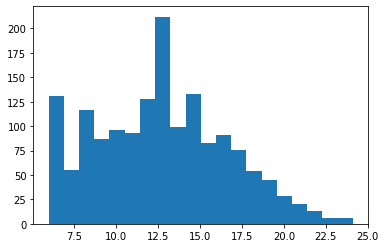

In [ ]:
#sns.barplot.
plt.hist(if_verified_yes_bad_loan_0.int_rate, 20)
plt.show

In [ ]:
if_verified_yes_bad_loan_0[if_verified_yes_bad_loan_0['int_rate'] == if_verified_yes_bad_loan_0.int_rate.min()]

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
1763,0,2,2,4,7000,6.0,2.0,75000.0,18.83,0,49.3,26,0,8,1


In [ ]:
if_verified_yes_bad_loan_0[if_verified_yes_bad_loan_0['int_rate'] < 24.11]

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,0,2,1,3,5000,10.65,10.000000,24000.0,27.65,0,83.7,9,0,26,1
3,0,2,8,4,10000,13.49,10.000000,49200.0,20.00,0,21.0,37,0,15,1
4,0,2,12,3,5000,7.90,3.000000,36000.0,11.20,0,28.3,12,0,7,1
5,0,2,0,4,3000,18.64,9.000000,48000.0,5.35,0,87.5,4,0,4,1
9,0,1,2,4,12000,12.69,10.000000,75000.0,10.78,0,67.1,34,0,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,0,2,2,24,10000,6.62,10.000000,45000.0,23.95,0,31.4,22,0,14,1
2993,1,0,3,9,29275,21.67,10.000000,185000.0,4.35,2,3.4,28,0,12,1
2996,0,0,2,12,6000,9.91,10.000000,36000.0,10.90,0,13.3,52,0,16,1
2997,1,1,10,9,4725,12.42,5.000000,37500.0,25.66,1,28.0,21,0,8,1


In [ ]:
shiba1 = if_verified_yes_bad_loan_0[if_verified_yes_bad_loan_0['int_rate'] < 24.11]
shiba1.head()

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,0,2,1,3,5000,10.65,10.0,24000.0,27.65,0,83.7,9,0,26,1
3,0,2,8,4,10000,13.49,10.0,49200.0,20.00,0,21.0,37,0,15,1
4,0,2,12,3,5000,7.90,3.0,36000.0,11.20,0,28.3,12,0,7,1
5,0,2,0,4,3000,18.64,9.0,48000.0,5.35,0,87.5,4,0,4,1
9,0,1,2,4,12000,12.69,10.0,75000.0,10.78,0,67.1,34,0,22,1


### Total verified = yes, bad loan 0 dengan int_rate < 24.11 % (ataw int_rate di atas 24%) di angka 1572
### ataw juga di sebut sebagai pengecualiannya untuk 6.0 itu sebagai outlier dari verified= yes, bad_loan = 0 dengan int_rate rendah

#   

#  

# Verified =1, bad_loan =1, int_rate...

### verified = yes, dengan bad_loan = 1, untuk mencari outlier int_rate yg rendah sehingga mendapatkan pengecualian 
### dengan int_rate yg masuk akal.

In [ ]:
if_verified_yes_bad_loan_1

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
1,1,2,0,10,2500,15.27,0.0,30000.0,1.00,0,9.4,4,1,12,1
6,1,1,10,4,5600,21.28,4.0,40000.0,5.55,0,32.6,13,1,7,1
7,1,2,8,35,5375,12.69,0.0,15000.0,18.08,0,36.5,3,1,7,1
10,0,2,2,37,9000,13.49,0.0,30000.0,10.08,0,91.7,9,1,7,1
12,0,2,8,4,10000,10.65,3.0,100000.0,7.06,0,55.5,29,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,1,2,2,27,14300,20.89,1.0,75000.0,10.93,0,40.0,58,1,15,1
2970,1,0,12,9,20000,20.30,5.0,80000.0,8.40,0,75.9,16,1,12,1
2974,0,0,2,17,10000,14.27,10.0,78000.0,4.52,0,79.5,8,1,17,1
2985,0,2,1,27,10000,15.27,0.0,30000.0,10.00,0,68.7,12,1,4,1


<function matplotlib.pyplot.show(close=None, block=None)>

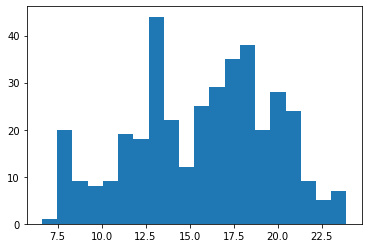

In [ ]:
plt.hist(if_verified_yes_bad_loan_1.int_rate, 20)
plt.show

In [ ]:
if_verified_yes_bad_loan_1.int_rate.min()

6.62

In [ ]:
if_verified_yes_bad_loan_1.int_rate.max()

23.91

In [ ]:
if_verified_yes_bad_loan_1.int_rate.value_counts()

13.49    22
12.69    22
16.77    22
14.27    22
18.64    21
17.27    20
11.71    19
12.42    18
18.25    17
20.30    16
17.58    15
15.27    15
20.89    13
14.65    12
19.91    12
21.28    11
19.42    10
15.96    10
19.03    10
7.51     10
7.90     10
10.65     9
8.90      9
9.91      8
16.29     7
22.35     5
21.67     5
22.06     4
23.13     3
23.52     3
6.62      1
23.91     1
Name: int_rate, dtype: int64

In [ ]:
if_verified_yes.bad_loan.value_counts()

0    1573
1     382
Name: bad_loan, dtype: int64

In [ ]:
if_verified_yes_bad_loan_1[if_verified_yes_bad_loan_1['int_rate'] == 6.62]
#if_bad_1[if_bad_1['int_rate'] < min_3shold_bad_1 ].shape

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
125,0,2,1,31,11100,6.62,10.0,41000.0,29.85,0,62.3,18,1,20,1


In [ ]:
if_verified_yes_bad_loan_1[if_verified_yes_bad_loan_1['int_rate']<23.91]

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
1,1,2,0,10,2500,15.27,0.0,30000.0,1.00,0,9.4,4,1,12,1
6,1,1,10,4,5600,21.28,4.0,40000.0,5.55,0,32.6,13,1,7,1
7,1,2,8,35,5375,12.69,0.0,15000.0,18.08,0,36.5,3,1,7,1
10,0,2,2,37,9000,13.49,0.0,30000.0,10.08,0,91.7,9,1,7,1
12,0,2,8,4,10000,10.65,3.0,100000.0,7.06,0,55.5,29,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,1,2,2,27,14300,20.89,1.0,75000.0,10.93,0,40.0,58,1,15,1
2970,1,0,12,9,20000,20.30,5.0,80000.0,8.40,0,75.9,16,1,12,1
2974,0,0,2,17,10000,14.27,10.0,78000.0,4.52,0,79.5,8,1,17,1
2985,0,2,1,27,10000,15.27,0.0,30000.0,10.00,0,68.7,12,1,4,1


In [ ]:
shiba2 = if_verified_yes_bad_loan_1[if_verified_yes_bad_loan_1['int_rate'] > 6.62]
#shiba2.head()

### Total verified = yes, bad loan 1 dengan int_rate < 23.91 % (ataw int_rate di atas 23%) di angka 381
### ataw juga di sebut sebagai pengecualiannya untuk 6.62 itu sebagai outlier dari verified= yes, bad_loan =1 dengan int_rate rendah

#### total data dari di verified = yes, dengan bad_loan yg masuk akal, dan int_rate yg masuk akal ataw  dihilangkan outlier 
#### bad_loan = 0, int_rate = 24% = 1572
#### bad_loan = 1, int_rate = 23.91% = 381
#### menjadi total verified 1 = 1953 / 1952 (tanpa outlier 24.11) 

In [ ]:
print('verifeid not :',if_verified_no.shape,'\n')
print('verifeid yes :',if_verified_yes.shape,'\n')


verifeid not : (1044, 15) 

verifeid yes : (1955, 15) 



#  

#  

# verified = 0, bad_loan = 0, int_rate = ... 


### verified = no, dengan bad_loan = 0, untuk mencari outlier int_rate yg rendah sehingga mendapatkan pengecualian 
### dengan int_rate yg masuk akal untuk 

In [ ]:
if_verified_no.bad_loan.value_counts()

0    878
1    166
Name: bad_loan, dtype: int64

In [ ]:
if_verified_no_bad_loan = if_verified_no.groupby('bad_loan')
if_verified_no_bad_loan_0 = if_verified_no_bad_loan.get_group(0)
if_verified_no_bad_loan_1 = if_verified_no_bad_loan.get_group(1)
#if_verified_yes.head()

In [ ]:
if_verified_no_bad_loan_0.shape

(878, 15)

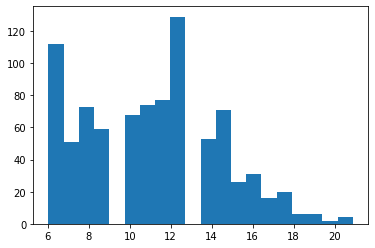

In [ ]:
plt.hist(if_verified_no_bad_loan_0.int_rate, 20)
plt.show()

In [ ]:
if_verified_no_bad_loan_0.int_rate.value_counts()

11.71    77
12.42    75
10.65    74
7.90     73
9.91     68
6.03     60
8.90     59
12.69    54
13.49    53
6.62     52
7.51     51
14.27    47
15.27    26
14.65    24
16.29    16
16.77    16
15.96    15
17.27    10
17.58    10
19.03     6
18.25     4
20.30     2
18.64     2
20.89     2
19.91     1
19.42     1
Name: int_rate, dtype: int64

In [ ]:
shiba3 = if_verified_no_bad_loan_0[if_verified_no_bad_loan_0['int_rate'] < if_verified_no_bad_loan_0.int_rate.max()]
shiba3.head()

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
2,0,2,10,12,2400,15.96,10.0,12252.0,8.72,0,98.5,10,0,10,0
8,1,1,2,3,6500,14.65,5.0,72000.0,16.12,0,20.6,23,0,13,0
13,0,2,2,20,1000,16.29,0.0,28000.0,20.31,0,81.5,23,0,4,0
14,0,2,3,4,10000,15.27,4.0,42000.0,18.60,0,70.2,28,0,13,0
15,0,0,5,6,3600,6.03,10.0,110000.0,10.52,0,16.0,42,0,18,0


#  

#  

# verified = 0, bad_loan = 1, int_rate = ... 

### verified = no, dengan bad_loan = 1, untuk mencari outlier int_rate yg rendah sehingga mendapatkan pengecualian 
### dengan int_rate yg

In [ ]:
if_verified_no_bad_loan_1.int_rate.value_counts()

12.69    19
11.71    18
14.27    14
7.90     12
16.29     9
15.27     9
8.90      8
9.91      8
6.62      7
7.51      7
12.42     7
10.65     7
13.49     6
14.65     5
15.96     5
17.27     5
19.03     4
16.77     4
19.42     2
18.25     2
17.58     2
6.03      1
20.89     1
21.67     1
23.13     1
20.30     1
19.91     1
Name: int_rate, dtype: int64

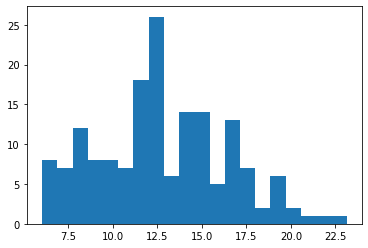

In [ ]:
plt.hist(if_verified_no_bad_loan_1.int_rate, 20)
plt.show()

In [ ]:
if_verified_no_bad_loan_1[if_verified_no_bad_loan_1['int_rate'] == if_verified_no_bad_loan_1.int_rate.min()]

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
1203,0,2,2,4,4000,6.03,2.0,54000.0,17.53,2,8.2,10,1,24,0


In [ ]:
shiba4 = if_verified_no_bad_loan_1[if_verified_no_bad_loan_1['int_rate'] < if_verified_no_bad_loan_1.int_rate.max()]
shiba4.head()

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
21,0,2,5,4,6000,11.71,1.0,76000.0,2.40,0,29.7,7,1,10,0
23,0,2,2,27,15000,14.27,9.0,60000.0,15.22,0,57.6,11,1,8,0
24,1,2,8,31,5000,16.77,2.0,50004.0,13.97,3,59.5,22,1,8,0
45,0,0,2,12,15000,9.91,8.0,80000.0,9.12,0,63.7,28,1,19,0
48,0,2,0,4,12000,15.96,4.0,50000.0,20.88,0,90.8,11,1,5,0


In [ ]:
print(shiba1.shape)
print(shiba2.shape)
print('\n')
print(shiba3.shape)
print(shiba4.shape)

(1571, 15)
(381, 15)


(876, 15)
(165, 15)


#  

#  

In [ ]:
print('verified not, bad loan = 0 with int_rate same as verifed yes ', shiba3.shape)
print('verified not, bad loan = 1 ', shiba4.shape) # same shit 2 int_rate high as verified yes

verified not, bad loan = 0 with int_rate same as verifed yes  (876, 15)
verified not, bad loan = 1  (165, 15)


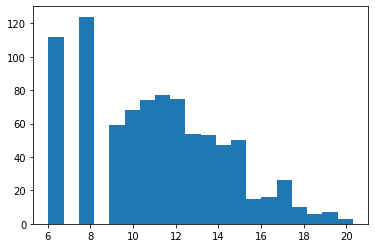

verified not, bad loan = 0 with int_rate same as verifed yes, int_rate =  20.89%


In [ ]:
plt.hist(shiba3.int_rate, 20)
plt.show() 
print('verified not, bad loan = 0 with int_rate same as verifed yes, int_rate =  20.89%')

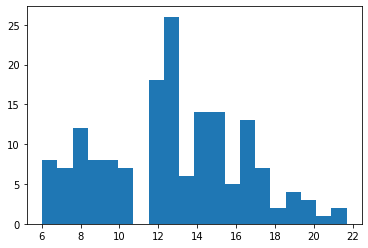

verified not, bad loan = 1 with int_rate same as verifed yes, int_rate =  23.13%


In [ ]:
plt.hist(shiba4.int_rate, 20)
plt.show() 
print('verified not, bad loan = 1 with int_rate same as verifed yes, int_rate =  23.13%')

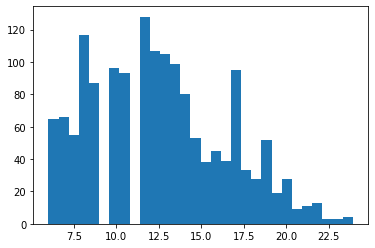

shiba1 is verified yes, bad loan = 0 with int_rate same as verifed not, int_rate =  24%


In [ ]:
plt.hist(shiba1.int_rate, 30)
plt.show() 
print('shiba1 is verified yes, bad loan = 0 with int_rate same as verifed not, int_rate =  24%')

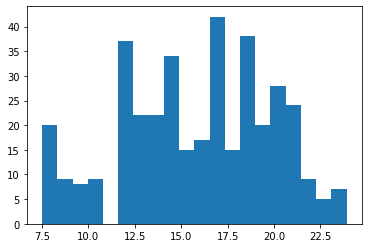

shiba2 is verified yes, bad loan = 1 with int_rate =  23%


In [ ]:
plt.hist(shiba2.int_rate, 20)
plt.show() 
print('shiba2 is verified yes, bad loan = 1 with int_rate =  23%')

#   

#  

# compare by DTI

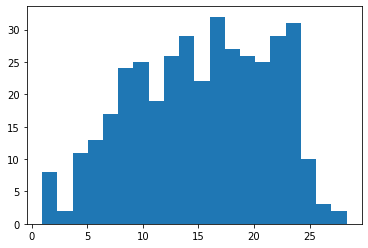

In [ ]:
plt.hist(shiba2.dti, 20)
plt.show() 
#print('shiba2 is verified yes, bad loan = 1 with int_rate =  23%')

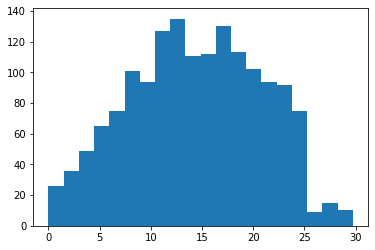

In [ ]:
plt.hist(shiba1.dti, 20)
plt.show() 
#print('shiba1 is verified yes, bad loan = 0 with int_rate same as verifed not, int_rate =  24%')

#  

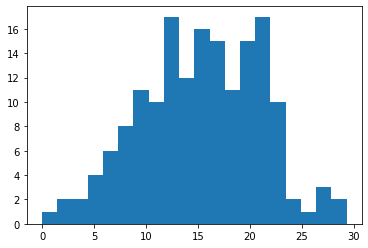

In [ ]:
plt.hist(shiba4.dti, 20)
plt.show() 
#print('verified not, bad loan = 1 with int_rate same as verifed yes, int_rate =  23.13%')

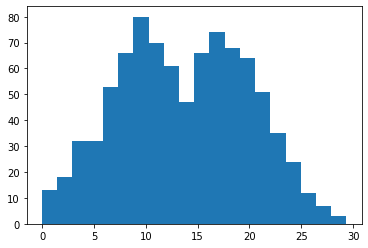

In [ ]:
plt.hist(shiba3.dti, 20)
plt.show() 
#print('verified not, bad loan = 0 with int_rate same as verifed yes, int_rate =  20.89%')

In [ ]:
# coba dengan revol_util

#  

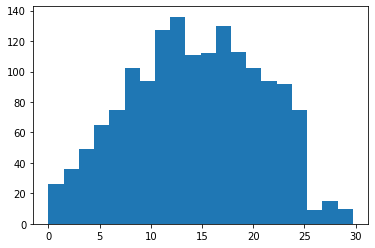

verified = yes, bad loan = no, dti = 


In [ ]:
plt.hist(if_verified_yes_bad_loan_0.dti, 20)
plt.show()
print('verified = yes, bad loan = no, dti = ')

In [ ]:
yes_NoBad_dti = if_verified_yes_bad_loan_0.dti.value_counts()
yes_NoBad_dti = pd.DataFrame(yes_NoBad_dti)
yes_NoBad_dti.to_csv('yes_NoBad_dti.csv')
yes_NoBad_dti

,dti
18.17,5
22.51,4
19.63,4
12.58,4
16.72,4
...,...
19.42,1
5.81,1
10.99,1
8.52,1


In [ ]:
if_verified_yes_bad_loan_0[if_verified_yes_bad_loan_0['dti'] == if_verified_yes_bad_loan_0.dti.min()]

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
2283,0,0,3,16,25000,7.9,10.0,200000.0,0.0,0,0.0,14,0,23,1


In [ ]:
if_verified_yes_bad_loan_0[if_verified_yes_bad_loan_0['dti']< 1].shape

(15, 15)

In [ ]:
if_verified_yes_bad_loan_0[if_verified_yes_bad_loan_0['dti'] < if_verified_yes_bad_loan_0.dti.quantile(0.95)]

In [ ]:
if_verified_yes_bad_loan_0[if_verified_yes_bad_loan_0['dti']< if_verified_yes_bad_loan_0.dti.max()]

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,0,2,1,3,5000,10.65,10.000000,24000.0,27.65,0,83.7,9,0,26,1
3,0,2,8,4,10000,13.49,10.000000,49200.0,20.00,0,21.0,37,0,15,1
4,0,2,12,3,5000,7.90,3.000000,36000.0,11.20,0,28.3,12,0,7,1
5,0,2,0,4,3000,18.64,9.000000,48000.0,5.35,0,87.5,4,0,4,1
9,0,1,2,4,12000,12.69,10.000000,75000.0,10.78,0,67.1,34,0,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,0,2,2,24,10000,6.62,10.000000,45000.0,23.95,0,31.4,22,0,14,1
2993,1,0,3,9,29275,21.67,10.000000,185000.0,4.35,2,3.4,28,0,12,1
2996,0,0,2,12,6000,9.91,10.000000,36000.0,10.90,0,13.3,52,0,16,1
2997,1,1,10,9,4725,12.42,5.000000,37500.0,25.66,1,28.0,21,0,8,1


#  

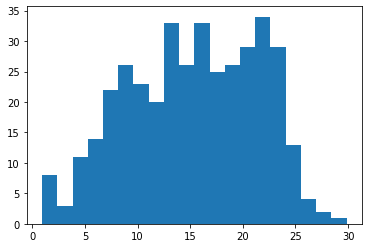

verified yes, bad loan = yes, dti = 


In [ ]:
plt.hist(if_verified_yes_bad_loan_1.dti, 20)
plt.show()
print('verified yes, bad loan = yes, dti = ')

In [ ]:
yes_badL_dti = if_verified_yes_bad_loan_1.dti.value_counts()
yes_badL_dti = pd.DataFrame(yes_badL_dti)
yes_badL_dti.to_csv('yes_badL_dti.csv')
yes_badL_dti

,dti
22.08,3
22.22,3
19.17,2
20.68,2
3.94,2
...,...
21.85,1
14.95,1
18.09,1
12.66,1


In [ ]:
if_verified_yes_bad_loan_1[if_verified_yes_bad_loan_1['dti'] == if_verified_yes_bad_loan_1.dti.min()]

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
274,1,2,10,35,30000,12.42,3.0,70000.0,0.94,0,3.2,14,1,5,1


In [ ]:
if_verified_yes_bad_loan_1[if_verified_yes_bad_loan_1['dti'] < 2].shape

(8, 15)

In [ ]:
if_verified_yes_bad_loan_1[if_verified_yes_bad_loan_1['dti'] <if_verified_yes_bad_loan_1.dti.quantile(0.5)]

In [ ]:
if_verified_yes_bad_loan_1[if_verified_yes_bad_loan_1['dti']<if_verified_yes_bad_loan_1.dti.max()]

,term,home_ownership,purpose,addr_state,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
1,1,2,0,10,2500,15.27,0.0,30000.0,1.00,0,9.4,4,1,12,1
6,1,1,10,4,5600,21.28,4.0,40000.0,5.55,0,32.6,13,1,7,1
7,1,2,8,35,5375,12.69,0.0,15000.0,18.08,0,36.5,3,1,7,1
10,0,2,2,37,9000,13.49,0.0,30000.0,10.08,0,91.7,9,1,7,1
12,0,2,8,4,10000,10.65,3.0,100000.0,7.06,0,55.5,29,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,1,2,2,27,14300,20.89,1.0,75000.0,10.93,0,40.0,58,1,15,1
2970,1,0,12,9,20000,20.30,5.0,80000.0,8.40,0,75.9,16,1,12,1
2974,0,0,2,17,10000,14.27,10.0,78000.0,4.52,0,79.5,8,1,17,1
2985,0,2,1,27,10000,15.27,0.0,30000.0,10.00,0,68.7,12,1,4,1


In [ ]:
if_verified_yes_bad_loan_1[if_verified_yes_bad_loan_1['dti']<if_verified_yes_bad_loan_1.dti.quantile(0.95)]

In [ ]:
print(if_verified_yes_bad_loan_0.shape)
print(if_verified_yes_bad_loan_1.shape)

(1573, 15)
(382, 15)


In [ ]:
if_verified = data.groupby('verification_status')

if_verified_no = if_verified.get_group(0)
if_verified_yes = if_verified.get_group(1)

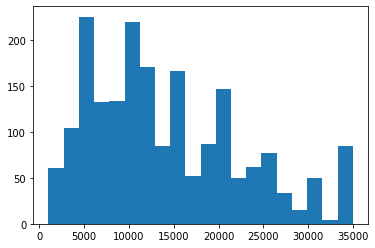

In [ ]:
plt.hist(if_verified_yes.loan_amnt, 20)
plt.show()


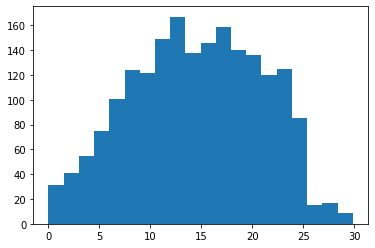

In [ ]:
plt.hist(if_verified_yes.dti, 20)
plt.show()


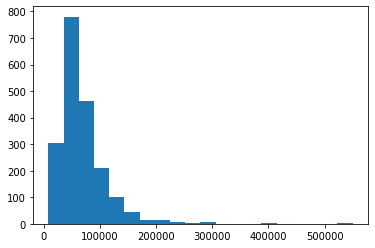

In [ ]:
plt.hist(if_verified_yes.annual_inc, 20)
plt.show()


# 

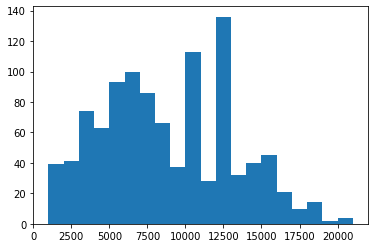

In [ ]:
plt.hist(if_verified_no.loan_amnt, 20)
plt.show()


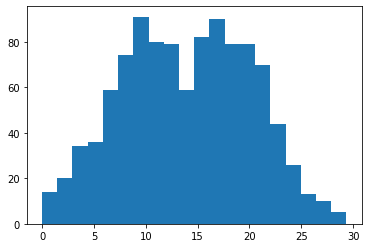

In [ ]:
plt.hist(if_verified_no.dti, 20)
plt.show()


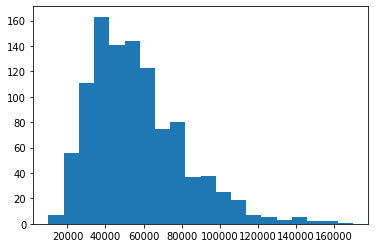

In [ ]:
plt.hist(if_verified_no.annual_inc, 20)
plt.show() 


#  

In [ ]:
if_verified_no_bad_loan_0.dti

2        8.72
8       16.12
13      20.31
14      18.60
15      10.52
        ...  
2988    20.28
2989     8.43
2990    18.57
2992     3.76
2995    10.17
Name: dti, Length: 878, dtype: float64

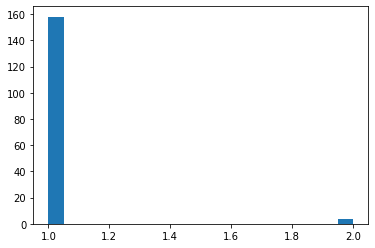

(162, 1)


In [ ]:
no_badL_dti = if_verified_no_bad_loan_1.dti.value_counts()
no_badL_dti = pd.DataFrame(no_badL_dti)
no_badL_dti.to_csv('no_badL_dti.csv')
no_badL_dti

plt.hist(no_badL_dti, 20)
plt.show()
print(no_badL_dti.shape)
#jumalah keunikan data jdi kesimpulannya 159 data uniq, 10> data dengan 2

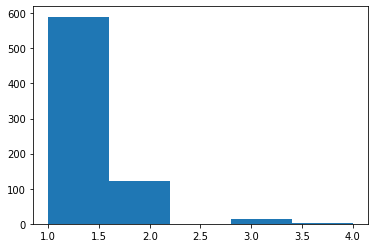

(726, 1)


In [ ]:
no_notbadL_dti = if_verified_no_bad_loan_0.dti.value_counts()
no_notbadL_dti = pd.DataFrame(no_notbadL_dti)
no_notbadL_dti.to_csv('no_notbadL_dti.csv')
no_notbadL_dti

plt.hist(no_notbadL_dti,5)
plt.show()
print(no_notbadL_dti.shape)
#jumalah keunikan data jdi kesimpulannya 590 data uniq, 100 data dengan 2 yang sama, 10> data dengan 3 

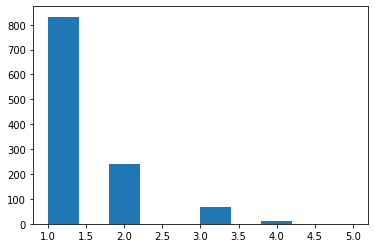

(1154, 1)


In [ ]:
yes_NoBad_dti = if_verified_yes_bad_loan_0.dti.value_counts()
yes_NoBad_dti = pd.DataFrame(yes_NoBad_dti)
yes_NoBad_dti.to_csv('yes_NoBad_dti.csv')
yes_NoBad_dti

plt.hist(yes_NoBad_dti,10)
plt.show()
print(yes_NoBad_dti.shape)
#jumalah keunikan data jdi kesimpulannya 800 data uniq, 200 data dengan 2 yang sama, 80 data dengan 3 
#yg sama dan seterusnya

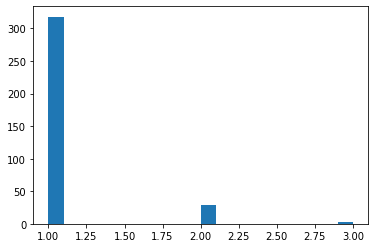

(349, 1)


In [ ]:
yes_Bad_dti = if_verified_yes_bad_loan_1.dti.value_counts()
yes_Bad_dti = pd.DataFrame(yes_Bad_dti)
yes_Bad_dti.to_csv('yes_Bad_dti.csv')
yes_Bad_dti

plt.hist(yes_Bad_dti,20)
plt.show()
print(yes_Bad_dti.shape)
#jumalah keunikan data jdi kesimpulannya 300 data uniq, 40 data dengan 2 yang sama, 20 > data dengan 3 


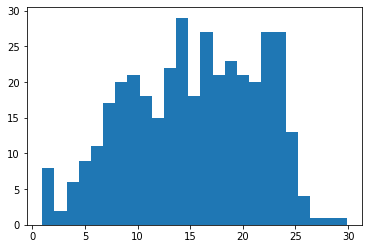

(382,)
mean 15.247041884816754
meadian 15.83


In [ ]:
plt.hist(if_verified_yes_bad_loan_1.dti,25)
plt.show()
#print(if_verified_yes_bad_loan_1.dti.max())
print(if_verified_yes_bad_loan_1.dti.shape)
print('mean',if_verified_yes_bad_loan_1.dti.mean())
print('meadian',if_verified_yes_bad_loan_1.dti.median())


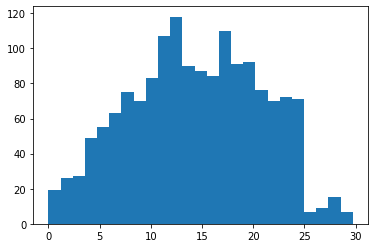

(1573,)
mean 14.37206611570248
meadian 14.35


In [ ]:
plt.hist(if_verified_yes_bad_loan_0.dti,25)
plt.show()
#print(if_verified_yes_bad_loan_0.dti.max())
print(if_verified_yes_bad_loan_0.dti.shape)
print('mean',if_verified_yes_bad_loan_0.dti.mean())
print('meadian',if_verified_yes_bad_loan_0.dti.median())


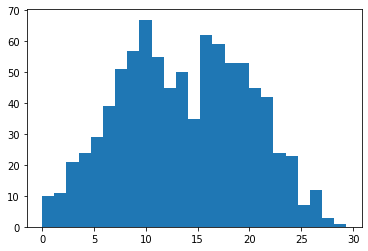

(878,)
mean 13.700136674259683
meadian 13.504999999999999


In [ ]:
plt.hist(if_verified_no_bad_loan_0.dti,25)
plt.show()
#print(if_verified_yes_bad_loan_0.dti.max())
print(if_verified_no_bad_loan_0.dti.shape)
print('mean',if_verified_no_bad_loan_0.dti.mean())
print('meadian',if_verified_no_bad_loan_0.dti.median())

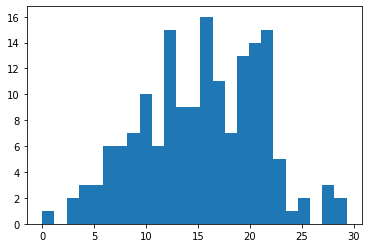

(166,)
mean 15.330060240963855
meadian 15.575


In [ ]:
plt.hist(if_verified_no_bad_loan_1.dti,25)
plt.show()
#print(if_verified_yes_bad_loan_0.dti.max())
print(if_verified_no_bad_loan_1.dti.shape)
print('mean',if_verified_no_bad_loan_1.dti.mean())
print('meadian',if_verified_no_bad_loan_1.dti.median())

In [ ]:
if_verified_no.dti.shape
printif_verified_yes.dti.shape)

(1044,)

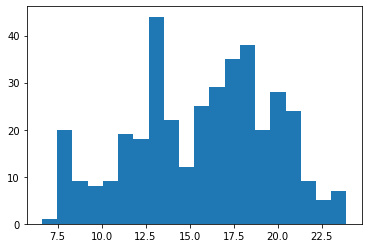

(382,)
mean 15.801518324607333
meadian 16.29


In [ ]:
plt.hist(if_verified_yes_bad_loan_1.int_rate, 20)
plt.show()
#print(if_verified_yes_bad_loan_1.int_rate.max())
print(if_verified_yes_bad_loan_1.int_rate.shape)
print('mean',if_verified_yes_bad_loan_1.int_rate.mean())
print('meadian',if_verified_yes_bad_loan_1.int_rate.median())


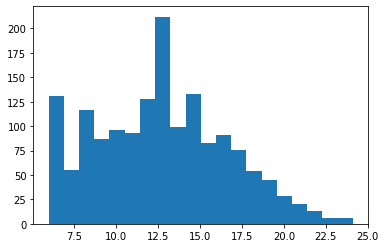

(1573,)
mean 12.606954863318498
meadian 12.42


In [ ]:
plt.hist(if_verified_yes_bad_loan_0.int_rate, 20)
plt.show()
#print(if_verified_yes_bad_loan_0.int_rate.max())
print(if_verified_yes_bad_loan_0.int_rate.shape)
print('mean',if_verified_yes_bad_loan_0.int_rate.mean())
print('meadian',if_verified_yes_bad_loan_0.int_rate.median())


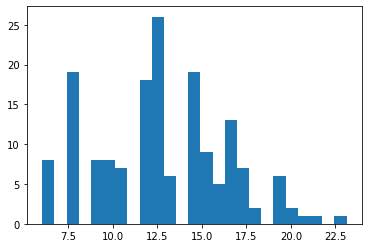

mean 12.815421686746989
meadian 12.69


In [ ]:
plt.hist(if_verified_no_bad_loan_1.int_rate, 25)
plt.show()
#print(if_verified_no_bad_loan_1.int_rate.max())
print('mean',if_verified_no_bad_loan_1.int_rate.mean())
print('meadian',if_verified_no_bad_loan_1.int_rate.median())


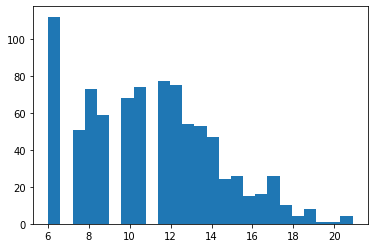

mean 11.125933940774487
meadian 11.71


In [ ]:
plt.hist(if_verified_no_bad_loan_0.int_rate, 25)
plt.show()
#print(if_verified_no_bad_loan_0.int_rate.max())
print('mean',if_verified_no_bad_loan_0.int_rate.mean())
print('meadian',if_verified_no_bad_loan_0.int_rate.median())


In [ ]:
if_verified_no_bad_loan = if_verified_no.groupby('bad_loan')
if_verified_no_bad_loan_0 = if_verified_no_bad_loan.get_group(0)
if_verified_no_bad_loan_1 = if_verified_no_bad_loan.get_group(1)
#if_verified_yes.head()

In [ ]:
yes_Bad_dti = if_verified_yes_bad_loan_1.dti.value_counts()
yes_Bad_dti = pd.DataFrame(yes_Bad_dti)
yes_Bad_dti.to_csv('yes_Bad_dti.csv')
yes_Bad_dti

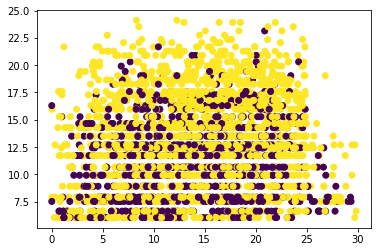

In [ ]:
#d1 = pd.DataFrame(if_verified_no.dti)
#d2 = pd.DataFrame(if_verified_yes.dti)

plt.scatter(data.dti, data.int_rate, c=data.verification_status)

In [ ]:
if_verified_yes_bad_loan_0.shape

(1573, 15)

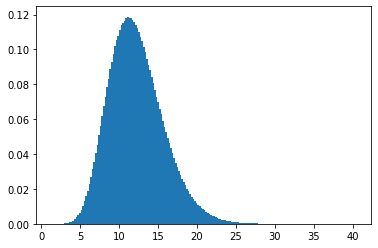

In [ ]:
shape, scale = 12.2, 2.2 # mean and width
s = np.random.default_rng().standard_gamma(shape, 10000000)
count, bins, ignored = plt.hist(s, 190, density=True)
#count, bins, ignored = plt.hist(s, 190)

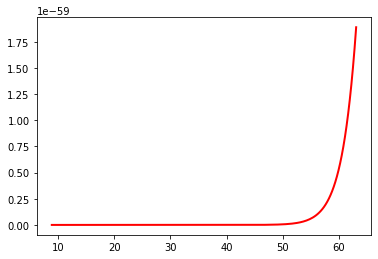

In [ ]:
import scipy.special as sps  


y = bins**(shape-1) * ((np.exp(-bins/scale))/(sps.gamma(shape) * scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
#plt.plot(y, linewidth=2, color='r')
plt.show()

In [ ]:
#np.random.exponential(1.2, 24)
np.random.default_rng().standard_gamma(2.3, 100)

array([6.04810234, 5.90528703, 4.73258718, 0.61009249, 2.95576595,
       1.69014728, 0.69887294, 5.6446139 , 4.20898015, 0.61821633,
       3.36299498, 2.13412083, 2.6082334 , 3.52920751, 0.96160233,
       1.62673922, 3.30358694, 0.75797337, 1.73431195, 0.77734068,
       4.79329618, 2.63357134, 1.15486928, 0.91257829, 6.03373821,
       0.61004608, 3.09790317, 3.0833    , 2.73923481, 0.31256767,
       1.59347586, 1.13525815, 4.15190527, 1.02442371, 3.86045142,
       2.26690122, 2.79968098, 2.1006558 , 3.76644797, 4.77611552,
       2.60932013, 0.59585365, 1.55013253, 2.22972015, 3.59065524,
       1.70986368, 2.55176026, 0.73040887, 1.42188067, 2.13647434,
       1.17975931, 5.15221861, 3.88698655, 1.54410053, 3.97350502,
       4.60784094, 1.80771737, 0.34966893, 0.19846651, 1.28726761,
       4.95756095, 3.24820249, 3.25237088, 1.40253769, 4.72892344,
       2.88671635, 0.83498268, 3.37745576, 1.91050852, 2.55886718,
       1.92670902, 1.43062617, 1.24869996, 1.93354459, 1.07419

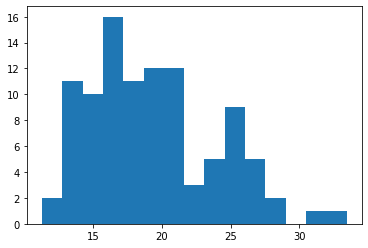

In [ ]:
import scipy.special as sps  

shape, scale = 20, 17.4   # mean and width
ss1 = np.random.default_rng().standard_gamma(shape, 100)

#count, bins, ignored = plt.hist(ss1, bins=26)
count, bins, ignored = plt.hist(ss1, 15)
#ignored = plt.hist(ss1, 15)

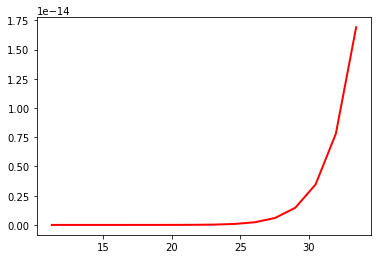

In [ ]:
y = bins**(shape-1) * ((np.exp(-bins/scale))/(sps.gamma(shape) * scale**shape))
#plt.plot(bins, y, linewidth=2, color='r')  
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

33.429941280756715

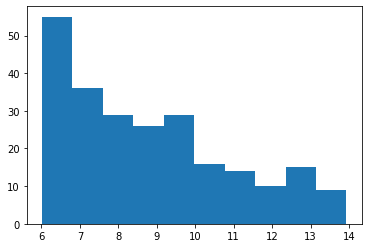

array([ 7.2647025 , 10.65921287, 11.55008964,  6.86975979,  6.03542742,
       11.0970477 ,  7.08407441,  7.02213974,  7.39583491,  6.81488838,
        6.50192725,  6.3853882 ,  8.3586203 , 12.42745705, 12.99145327,
        6.46807051, 12.51687986,  6.50447036, 13.22544363,  6.51645499,
        8.3314518 ,  9.83772825,  7.17787856,  9.87506745, 11.16899789,
        8.42517333,  7.46388048,  7.969371  ,  6.38274278,  8.40487904,
       10.76726523,  7.3728575 ,  8.74845515,  9.42629128,  6.0148197 ,
       13.44931402,  6.45513558,  7.97116815,  9.68028054,  6.0262618 ,
        8.21135996,  7.34762421, 10.58919324,  8.10645167, 13.84818065,
       10.85981481,  6.25858776,  8.52100821,  6.02126011,  6.55907659,
        8.73488655,  9.4300081 ,  6.52588918, 12.03877571, 10.76543115,
        7.05314722,  6.14209384, 11.16305883,  6.35618894,  6.14299259,
        6.27608508,  9.90713421, 11.37228049, 12.42800351, 12.03835093,
        6.37955679,  6.15477661, 10.08006397,  7.19142187,  6.40

In [ ]:
s = np.random.default_rng().standard_cauchy(8000)
s = s[(s>6) & (s<14)]  # truncate distribution so it plots well
#plt.hist(s, bins=30)
plt.hist(s)
plt.show()
s

In [ ]:
s.max()

13.933425929741334

In [ ]:
#np.exp(-bins/1).max()
#-bins/1
#np.random.binomial(7, .9, size=23).min()
#np.random.dirichlet((10, 5, 3), 20)
abin = [51000000,55000000,60000000,65000000,70000000,75000000,80000000,85000000,90000000,95000000,100000000,110000000,120000000,130000000,140000000,150000000,160000000,170000000,180000000,190000000,200000000,225000000,250000000,275000000,300000000,325000000,350000000,375000000,400000000]
rng = np.random.default_rng()



In [ ]:
"""
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher', 'rimau']
#aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
#rng.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3, 0.02])
rng.choice(aa_milne_arr, 6, p=[1,2,3,4,5])
"""
mean = [13.3, 22.3]
cov = [[1, 0], [0, 100]]  # diagonal covariance


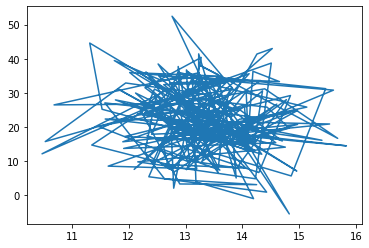

In [ ]:

x, y = np.random.multivariate_normal(mean, cov, 200).T
#plt.plot(x, y, 'x')
#plt.axis('equal')
plt.plot(x, y )
plt.show()


In [ ]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 100)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 100)



In [ ]:
np.corrcoef(x, y)

array([[ 1.        , -0.92185652],
       [-0.92185652,  1.        ]])

In [ ]:
x


array([43, 15, 26, 18,  5, 14, 31, 29, 36, 31, 32, 49, 36, 22, 26,  6, 37,
        4,  0, 11, 24, 35, 44, 18,  2, 46, 30, 11, 20, 29, 18,  1, 42, 32,
       14, 24, 16,  6, 20, 49, 29, 34, 26, 14, 12, 23, 12, 25, 30, 33,  1,
       23, 18, 21, 43, 21, 40, 14, 34, 49,  0, 46, 39, 24, 24, 21, 15, 11,
       43, 20, 23, 11, 30, 42, 39, 36, 30,  7, 48, 44, 17, 35, 39, 24, 38,
       31, 41, 42, 34, 40, 19,  0, 12, 27, 30, 35, 29, 13, 24,  4])

In [ ]:
y


array([ 67.00141502,  87.63188226,  72.51238482,  80.89986432,
        98.40815256,  89.40914757,  72.32733437,  71.62800632,
        68.89146558,  71.70266724,  80.99140357,  42.12998638,
        60.60539842,  75.00753111,  70.82098413,  89.14783024,
        65.12552527,  96.55958423,  93.02414745,  91.96873082,
        80.9822613 ,  59.95963562,  60.37381534,  85.51731349,
       101.6236056 ,  60.64561809,  58.67475123,  91.37759115,
        84.66633377,  69.12728195,  79.63747635,  93.85971745,
        63.53343415,  66.19337197,  87.95683591,  80.59182432,
        81.89147066, 102.44792137,  75.29691126,  56.30336049,
        63.36169392,  64.55490211,  71.2751586 ,  89.96889997,
        85.85163036,  70.49672039,  86.31462915,  62.81182127,
        74.82352909,  66.52864599,  95.58171978,  79.64849111,
        89.9171619 ,  74.13742087,  59.41444942,  77.70969292,
        70.48075444,  91.42980909,  75.96893487,  47.46886154,
        88.58747698,  49.69231872,  64.06579357,  78.07

In [ ]:
df = pd.read_csv('favrtraining.csv')
df.head()

,penghasilan,lama_bisnis_operasi,operasional,usia,harga_jaminan,tenor,pinjaman,rasio_utang,status_verified
0,3132,5,1500,34,5000,12,3632,2.225490,ya
1,3931,5,2000,43,6500,22,4581,2.372346,ya
2,3605,5,1600,43,5800,22,4185,2.087282,ya
3,3948,5,2000,43,6500,22,4598,2.360370,ya
4,3039,5,1500,34,5000,12,3539,2.299545,ya


In [ ]:
df.status_verified.value_counts()

tidak    2500
ya       2500
Name: status_verified, dtype: int64

array([[1.        , 0.74461867],
       [0.74461867, 1.        ]])

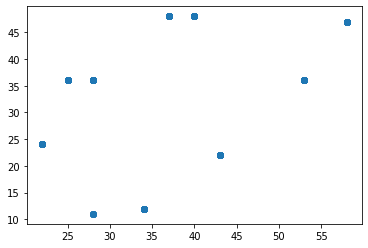

In [ ]:
plt.scatter(df.usia, df.tenor)
np.corrcoef(df.tenor, df.usia)


In [ ]:
target = df['status_verified']
#cat_data.drop('addr_state', axis=1, inplace=True)
df.drop('status_verified', axis=1, inplace=True)
target = target.map({'ya': 1 , 'tidak' : 0})

In [ ]:
df = pd.concat([df, target], axis=1)
df = df.iloc[:, 0:15]
df

,penghasilan,lama_bisnis_operasi,operasional,usia,harga_jaminan,tenor,pinjaman,rasio_utang,status_verified
0,3132,5,1500,34,5000,12,3632,2.225490,1
1,3931,5,2000,43,6500,22,4581,2.372346,1
2,3605,5,1600,43,5800,22,4185,2.087282,1
3,3948,5,2000,43,6500,22,4598,2.360370,1
4,3039,5,1500,34,5000,12,3539,2.299545,1
...,...,...,...,...,...,...,...,...,...
4995,1652,3,1602,28,5700,36,2450,49.000000,0
4996,915,1,885,22,5000,24,1615,53.833333,0
4997,1205,2,1155,25,5700,36,2003,40.060000,0
4998,2001,3,1931,28,6000,36,2841,40.585714,0


In [ ]:
df.status_verified.value_counts()

1    2500
0    2500
Name: status_verified, dtype: int64

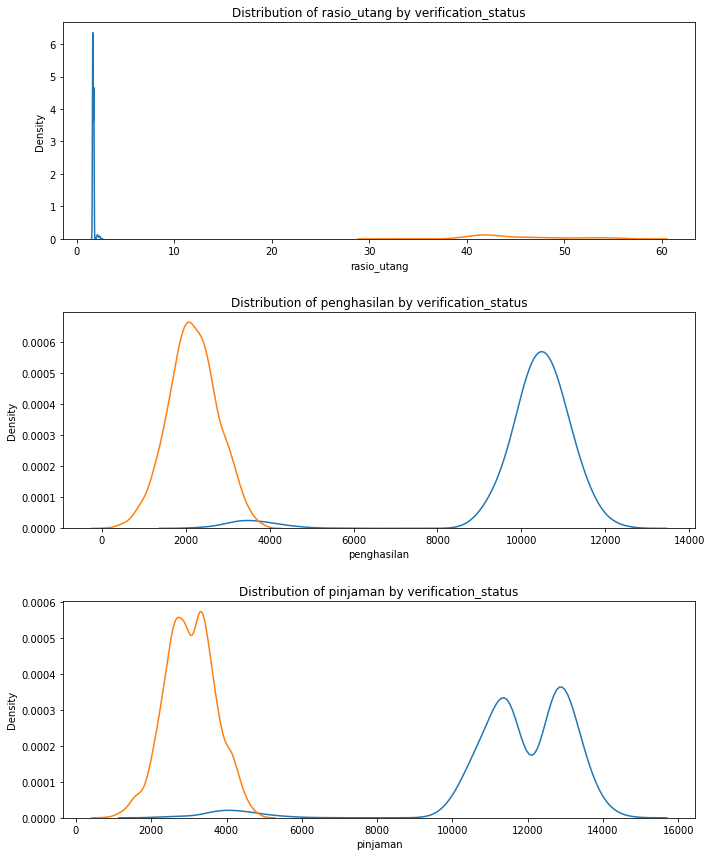

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['rasio_utang', 'penghasilan', 'pinjaman']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['status_verified'] == 1, source], label = 'Repaid in time')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['status_verified'] == 0, source], label = 'Difficulty in payment')
    
    # Label the plots
    plt.title('Distribution of {} by verification_status'.format(source))
    plt.xlabel(source) 
    plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)